# Chapter 8

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
'''
DSC 530
Week 6

Programming Assignment Week 6
Author: Joshua Greenert
Date: 7/14/2022
'''
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
import numpy as np

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [4]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3812821688772012
rmse median 0.45797595801966445


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.13405854437587233
mean error unbiased 0.010265031561482273


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

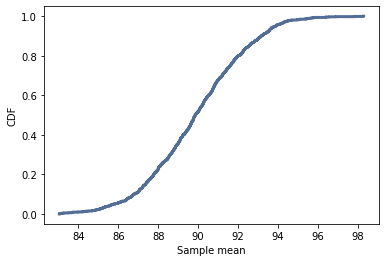

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [9]:
np.mean(xbars)

89.91390136095366

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.81126016949241, 93.89407659682742)

And the RMSE of the sample means is called the standard error.

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.468330931234478

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.1468337124446342
rmse Lm 1.6959861636878684
mean error L 0.3160869371970257
mean error Lm 0.40641576799792667


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



The standard error using n=10 is: 0.8336996660969843
The confidence interval using n=10 is: (1.2570110164480863, 3.7372442125649354)


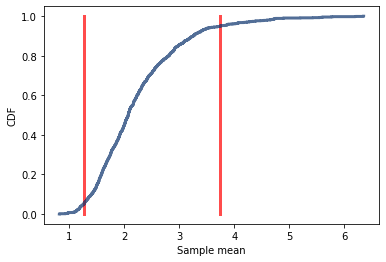

In [27]:
# Using SimulateSample and resulting graph instances from above to start.
def SimulateSample(mu, n, iters):
    xbars = []
    for j in range(iters):
        # Using line from estimate3 for exponential
        xs = np.random.exponential(1.0/mu, n)

        # Need to take 1 divided by the mean.
        xbar = 1 / np.mean(xs)
        xbars.append(xbar)

    # Compute the standard error and the confidence interval.
    standardError = RMSE(xbars, mu)
    print(f'The standard error using n={n} is: {standardError}')

    # Confidence interval pulled from above.
    cdf = thinkstats2.Cdf(xbars)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print(f'The confidence interval using n={n} is: {ci}')

    # Plot the values for SE and CI
    fivePercent = ci[0]
    ninetyfivePercent = ci[1]
    thinkplot.Plot([fivePercent, fivePercent], [0, 1], color='red')
    thinkplot.Plot([ninetyfivePercent, ninetyfivePercent], [0, 1], color='red')

    # Plot the data collected.
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample mean', ylabel='CDF')

SimulateSample(2, 10, 1000)

The standard error using n=5 is: 1.5480261641432496
The confidence interval using n=5 is: (1.06580521750735, 4.9987377087718565)


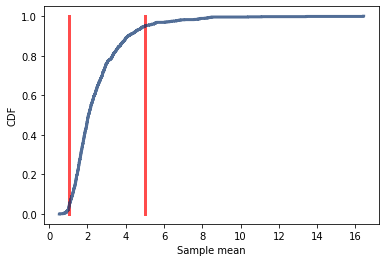

In [33]:
# Repeat the experiment with a few different values of n
#SimulateSample(2, 20, 1000)
# ci (3.02 - 1.43) = 1.59

SimulateSample(2, 5, 1000)
# ci (4.99 - 1.06) = 3.4

# As the value of n increases, the confidence interval decreases.

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [35]:
# Using the sample provided above from estimate 3
def Estimate4(n=7, iters=1000):
    # Adding in mu and signma
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        # Pulled from book
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    # Check the performance of the two estimators.
    print('mean error L', MeanError(means, mu))
    print('mean error Lm', MeanError(medians, mu))

# Run the function
Estimate4()

mean error L 0.0032044710735228826
mean error Lm -0.010266519033682238


In [37]:
# Using the sample provided above from estimate 4 updated for variance.
def Estimate5(n=7, iters=1000):
    # Adding in mu and signma
    mu = 0
    sigma = 1

    # Changed term names to values.
    values1 = []
    values2 = []

    for _ in range(iters):
        # Pulled from book
        xs = [random.gauss(mu, sigma) for i in range(n)]

        # Biased and unbiased check
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)

        values1.append(biased)
        values2.append(unbiased)

    # Check the performance of the two estimators.
    print('RMSE biased: ', RMSE(values1, sigma**2))
    print('RMSE unbiased: ', RMSE(values2, sigma**2))

# Run the function
Estimate5()

RMSE biased:  0.5383458205273352
RMSE unbiased:  0.600860802414495
